In [136]:
from PIL import Image
import matplotlib.pyplot as plt
from graphviz import Digraph
import pandas as pd
from matplotlib.patches import FancyBboxPatch

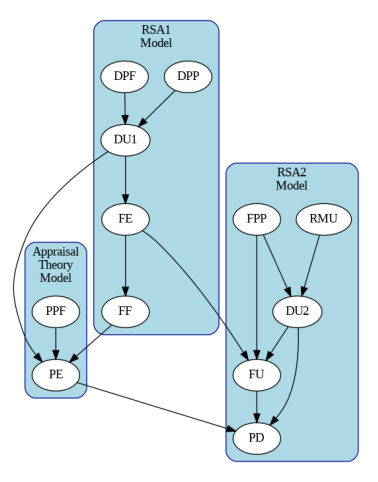

In [223]:
# Define the Graph's general information
dot = Digraph(comment='DAG')
dot.attr('node', style='rounded,filled', fillcolor='white')
dot.attr('edge')

dot.node('DPP', 'DPP')
dot.node('DPF', 'DPF')
dot.node('DU1', 'DU1')
dot.node('FE', 'FE')
dot.node('FF', 'FF')
dot.node('PPF', "PPF")
dot.node('PE', "PE")
dot.node('PD', "PD")
dot.node('FU', 'FU')
dot.node('RMU', 'RMU')
dot.node('DU2', 'DU2')
dot.node('FPP', 'FPP')

# Add edges to the graph
edges = [
    ('DPP', 'DU1'),
    ('DPF', 'DU1'),
    ('DU1', 'FE'),
    ('FE', 'FF'),
    ('FF', 'PE'),
    ('PPF', 'PE'),
    ('DU1', 'PE'),
    ('PE', 'PD'),
    ('RMU', 'DU2'),
    ('FU', 'PD'),
    ('DU2', 'PD'),
    ('DU2', 'FU'),
    ('FE', 'FU'),
    ('FPP', 'FU'),
    ('FPP', 'DU2'),
]
dot.edges(edges)

# Define the subgraphs/clusters
with dot.subgraph(name='cluster_RSA1') as c:
    c.attr(label='RSA1\nModel', color='blue4', style='rounded,filled', fillcolor='lightblue')
    c.node('DPP')
    c.node('DPF')
    c.node('DU1')
    c.node('FE')
    c.node('FF')

with dot.subgraph(name='cluster_Appraisal') as c:
    c.attr(label='Appraisal\nTheory\nModel', color='blue4', style='rounded,filled', fillcolor='lightblue')
    c.node('PPF')
    c.node('PE')

with dot.subgraph(name='cluster_RSA2') as c:
    c.attr(label='RSA2\nModel', color='blue4', style='rounded,filled', fillcolor='lightblue')
    c.node('FPP')
    c.node('RMU')
    c.node('DU2')
    c.node('FU')
    c.node('PD')

dot.render('dag', format='png')

# Show the generated DAG

img_path = '/content/dag.png'
img = Image.open(img_path)

plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

In [224]:
# Create a new image with white background and paste the original DAG image onto the
# new image. So that the result has extra white spacefor the legend table to it
dag_image = Image.open('dag.png')
new_width = dag_image.width * 2 + 130
new_height = dag_image.height
new_image = Image.new("RGB", (new_width, new_height), "white")
new_image.paste(dag_image, (28, 0))

new_image.save('dag2.png')
new_image.show()

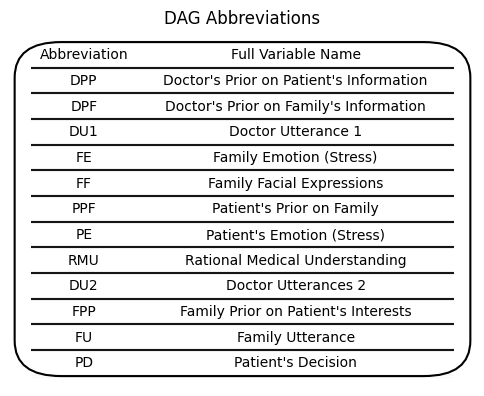

In [252]:
# Abbreviations and their full descriptions for the legend table
legend_labels = {
    'DPP': "Doctor's Prior on Patient's Information",
    'DPF': "Doctor's Prior on Family's Information",
    "DU1": "Doctor Utterance 1",
    "FE": "Family Emotion (Stress)",
    "FF": "Family Facial Expressions",
    "PPF": "Patient's Prior on Family",
    "PE": "Patient's Emotion (Stress)",
    "RMU": "Rational Medical Understanding",
    "DU2": "Doctor Utterances 2",
    "FPP": "Family Prior on Patient's Interests",
    "FU": "Family Utterance",
    "PD": "Patient's Decision",
}

legend_df = pd.DataFrame(list(legend_labels.items()), columns=["Abbreviation", "Full Variable Name"])

plt.figure(figsize=(6, 4.6))
ax = plt.gca()
table = plt.table(cellText=legend_df.values, colLabels=legend_df.columns, loc='center', cellLoc='center', edges='horizontal')

# Customizing the table's appearance for a better look
for key, cell in table.get_celld().items():
    cell.set_edgecolor("black")
    cell.set_linewidth(1.5)
    cell.set_facecolor("lightgrey" if key[0] == 0 else "white")
    cell.set_alpha(0.7)
    cell.set_fontsize(10)

table.auto_set_font_size(False)
table.auto_set_column_width([0, 1])
table.scale(1.5, 1.54)

fancy_bbox1 = FancyBboxPatch(
    (0, .128), 1.5, 0.743,
    boxstyle="round,pad={}".format(0.1), edgecolor="white", facecolor='none',
    linewidth=1.5, transform=ax.transAxes
)
fancy_bbox2 = FancyBboxPatch(
    (0.11, .128), .78, 0.743,
    boxstyle="round,pad={}".format(0.1), edgecolor="black", facecolor='none',
    linewidth=1.5, transform=ax.transAxes
)

ax.add_patch(fancy_bbox1)
ax.add_patch(fancy_bbox2)

plt.axis("off")
plt.title("DAG Abbreviations")

plt.savefig('table.png', bbox_inches='tight', pad_inches=0)

plt.show()

<ipython-input-265-0f5f3715a356>:8: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_table_image = table_image.resize((new_width, new_height), Image.ANTIALIAS)
<ipython-input-265-0f5f3715a356>:20: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  final_dag = dag_image.resize((dag_new_width, dag_new_height), Image.ANTIALIAS)


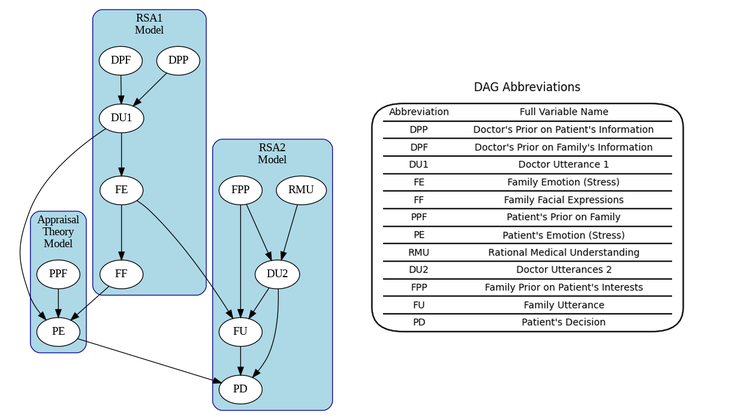

In [265]:
dag_image = Image.open('/content/dag2.png')
table_image = Image.open('/content/table.png')

# Define the new table size
scale_factor = 1.14
new_width = int(table_image.width * scale_factor)
new_height = int(table_image.height * scale_factor)
resized_table_image = table_image.resize((new_width, new_height), Image.ANTIALIAS)

# Select the location of dag_image that the center of table needs to be
x_center = 880
y_center = 350
x_top_left = x_center - (resized_table_image.width // 2)
y_top_left = y_center - (resized_table_image.height // 2)
dag_image.paste(resized_table_image, (x_top_left, y_top_left), resized_table_image)

# Resize the combined image
dag_new_width = int(dag_image.width * 0.6)
dag_new_height = int(dag_image.height * 0.6)
final_dag = dag_image.resize((dag_new_width, dag_new_height), Image.ANTIALIAS)

# Save the final model
final_dag.save('SDM-Proposal.png')

final_dag.show()